# Prosper Loan Data Exploration
## by Chinonso Okonkwo

## 1. Introduction

This document explores a dataset containing loan amount, Borrower Income( Stated Monthly Income), Debt-Income-Ratio, Loan Term, Prosper Score, and many others for approximately 114,000 rows of loan data.<br>

For better understanding of variables, [Here's a link to the data dictionary](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing)


# Table of Contents.
1. [Introduction](#1.-Introduction)
<br>

2. [Preliminary Wrangling](#2.-Preliminary-Wrangling)<br>
    2.1 [Gather](#2.1-Gather)<br>
    2.2 [Assess](#2.2-Assess)<br>
    2.3 [Clean](#2.3-Clean)<br>
<br>

3. [Report](#3.-Report)<br>
    3.1 [Overview of Subset dataframe](#3.1-Overview-of-Subset-dataframe) <br>
    3.2 [What is the structure of your dataset?](#3.2-What-is-the-structure-of-your-dataset?)<br>
    3.3 [What is/are the main feature(s) of interest in your dataset?](#3.3-What-is/are-the-main-feature(s)-of-interest-in-your-dataset?)<br>
    3.4 [What features in the dataset do you think will help support your investigation into your feature(s) of interest?](#3.4-What-features-in-the-dataset-do-you-think-will-help-support-your-investigation-into-your-feature(s)-of-interest?)<br>
<br>

4. [Univariate Exploration](#4.-Univariate-Exploration)<br>
    4.1 [Observations](#4.1-Observations)<br>
<br>

5. [Bivariate Exploration](#5.-Bivariate-Exploration)<br>
    5.1 [Observations](#5.1-Observations)<br>
<br>

6. [Multivariate Exploration](#6.-Multivariate-Exploration)<br>
    6.1 [Observations](#6.1-Observations)<br>
<br>

7. [Conclusion](#7.-Conclusion)

## 2. Preliminary Wrangling

### 2.1 Gather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline


In [2]:
#Loading dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
# checking the column names
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

**Subsetting the dataframe**<br>
I want to pick only the columns I'll need for exploration and analysis in general.

In [6]:
df_sub = df[['ListingNumber','Term', 'LoanStatus', 'IncomeRange',
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
             'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment',]]

### 2.2 Assess

In [7]:
# Checking the first five rows
df_sub.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,36,Completed,Not displayed,NaN,NaN,0,GA,Other,Not available,NaN,0.06,False,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97


In [8]:
# Getting a concise summary of data
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
ListingNumber                113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
IncomeRange                  113937 non-null object
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
DebtToIncomeRatio            105383 non-null float64
IsBorrowerHomeowner          113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
LoanOriginationQuarter       113937 non-null object
MonthlyLo

In [9]:
# Checking nulls
df_sub.isnull().sum()

ListingNumber                    0
Term                             0
LoanStatus                       0
IncomeRange                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
DebtToIncomeRatio             8554
IsBorrowerHomeowner              0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
dtype: int64

In [10]:
# Checking the number of rows and columns present in dataframe
df_sub.shape

(113937, 18)

In [11]:
# Checking for duplicates
df_sub.duplicated().sum()

0

In [12]:
# Getting count of unique values in LoanStatus Column
df_sub.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
df_sub['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [14]:
df_sub['ProsperRating (Alpha)'].isnull().sum()

29084

In [15]:
# Getting count of unique values in ListingCategory Column
df_sub['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [16]:
df_sub.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [17]:
# Getting count of unique values in IsBorrowerHomeowner Column
df_sub.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [18]:
df_sub.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [19]:
# Getting count of unique values in StatedMonthlyIncome Column
df_sub.StatedMonthlyIncome .value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
5833.333333     2319
6250.000000     2276
2500.000000     2256
4583.333333     2211
6666.666667     2162
2916.666667     1984
8333.333333     1680
4333.333333     1527
7083.333333     1464
7500.000000     1448
3500.000000     1394
0.000000        1394
10000.000000    1282
4000.000000     1260
2083.333333     1256
3000.000000     1218
2666.666667     1110
6000.000000     1051
9166.666667      969
3166.666667      958
4500.000000      870
7916.666667      811
5166.666667      804
4666.666667      760
12500.000000     759
                ... 
3972.666667        1
5103.666667        1
8493.333333        1
8494.083333        1
3350.500000        1
2177.916667        1
6354.250000        1
1805.000000        1
5111.083333        1
3.166667           1
6748.500000        1
5572.000000        1
3212.333333        1
5804.500000        1
8170.666667        1
3512.000000        1
5721.583333  

### Assessments

1. Missing values in ProsperRating(Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration columns.
2. Convert Listing category from numeric to Categorical datatype
3. Listing Number tostring, LoanOriginationDate to Datetime (extract year, month, day and time Loan originated), LoanStatus from string to categorical, ProsperRating(Alpha) and ProsperScore from string  to Categorical datatype, ListingCategory from int to ordered Categorical datatype, IncomeRange from int to Ordered Categorical datatype, EmploymentStatus from string to Categorical
4. Replace True with 'Home Owner' and false with 'Not Home Owner' then change datatype to categorical
5. Round StatedMonthlyIncome to the nearest whole number (nearest dollar)

In [20]:
# Creating a copy of the dataframe
df_clean = df_sub.copy()

### 2.3 Clean

#### Issue 1:

In [21]:
# Filtering to get only rows where the Prosper rating is not null (this is an important factor in assessing risk level of loans)
df_clean = df_clean[df_clean['ProsperRating (Alpha)'].notnull()]

In [22]:
df_clean = df_clean[df_clean['DebtToIncomeRatio'].notnull()]

In [23]:
df_clean = df_clean[df_clean['EmploymentStatusDuration'].notnull()]

In [24]:
#Test
df_clean['ProsperRating (Alpha)'].isnull().sum()


0

In [25]:
#Test
df_clean['DebtToIncomeRatio'].isnull().sum()


0

In [26]:
#Test
df_clean['EmploymentStatusDuration'].isnull().sum()


0

#### Issue 2:

In [27]:
# Rounding StatedMonthlyIncome to 2 dp ()
df_clean.StatedMonthlyIncome = df_clean.StatedMonthlyIncome.round(decimals=0)
df_clean.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.0,10000,2014-03-03 00:00:00,Q1 2014,318.93
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.0,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.0,15000,2013-09-20 00:00:00,Q3 2013,563.97
5,1074836,60,Current,"$100,000+",B,10.0,1,NM,Professional,Employed,82.0,0.36,True,8333.0,15000,2013-12-24 00:00:00,Q4 2013,342.37
6,750899,36,Current,"$25,000-49,999",E,2.0,1,KS,Sales - Retail,Employed,172.0,0.27,False,2083.0,3000,2013-04-18 00:00:00,Q2 2013,122.67


In [28]:
#Test
df_clean.StatedMonthlyIncome.value_counts()

4167.0     2429
5000.0     2307
3333.0     1916
5833.0     1830
5417.0     1770
6250.0     1652
4583.0     1625
3750.0     1618
6667.0     1612
2500.0     1252
8333.0     1206
2917.0     1196
4333.0     1134
7083.0     1127
7500.0     1122
3500.0      978
10000.0     966
4000.0      859
6000.0      811
9167.0      788
3000.0      724
2667.0      687
3167.0      645
4500.0      642
2083.0      642
7917.0      629
5167.0      621
4667.0      603
4833.0      566
5667.0      541
           ... 
8819.0        1
10842.0       1
15863.0       1
1385.0        1
1484.0        1
17631.0       1
6340.0        1
11564.0       1
4412.0        1
1257.0        1
10875.0       1
6648.0        1
2346.0        1
13807.0       1
10544.0       1
4078.0        1
4414.0        1
3391.0        1
5772.0        1
6547.0        1
1599.0        1
10382.0       1
1962.0        1
8826.0        1
991.0         1
9608.0        1
14998.0       1
8146.0        1
12978.0       1
1543.0        1
Name: StatedMonthlyIncom

#### Issue 3:

In [29]:
# Converting boolean to string
df_clean.IsBorrowerHomeowner = df_clean.IsBorrowerHomeowner.map({True: 'True', False: 'False'}) 
# Replace True with Home Owner and False, with Not Home Owner
df_clean.IsBorrowerHomeowner.replace('True', 'Home Owner', inplace=True)
df_clean.IsBorrowerHomeowner.replace('False', 'Not Home Owner', inplace=True)



In [30]:
# Test
df_clean.IsBorrowerHomeowner.value_counts()

Home Owner        42058
Not Home Owner    35485
Name: IsBorrowerHomeowner, dtype: int64

#### Issue 4:

In [31]:
# Filling missing values in Occupation column with None Given
df_clean.Occupation = df_clean.Occupation.fillna('None Given')

In [32]:
#Test
df_clean.Occupation.isnull().sum()

0

#### Issue #5:

In [33]:
from datetime import datetime

In [34]:
df_clean.LoanOriginationDate = pd.to_datetime(df_clean.LoanOriginationDate)

In [35]:
df_clean['LoanOriginationYear'] = df_clean['LoanOriginationDate'].dt.year
df_clean['LoanOriginationMonth'] = df_clean['LoanOriginationDate'].dt.month
df_clean['LoanOriginationTime'] = df_clean['LoanOriginationDate'].dt.time

In [36]:
# Test

In [37]:
# Drop LoanOriginationDateColumn
df_clean = df_clean.drop(['LoanOriginationDate'], axis=1)

In [38]:
#Test

df_clean.head(3)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,Not Home Owner,6125.0,10000,Q1 2014,318.93,2014,3,00:00:00
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,Home Owner,2875.0,10000,Q4 2012,321.45,2012,11,00:00:00
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,Home Owner,9583.0,15000,Q3 2013,563.97,2013,9,00:00:00


In [39]:
# Replace the numbers 1,2... with January, Febuary, ...
df_clean['LoanOriginationMonth'] = df_clean['LoanOriginationMonth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
        ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'])

In [40]:
df_clean.LoanOriginationMonth.value_counts()

January      8468
October      8096
December     8078
November     7444
Febuary      7127
September    6314
August       6082
July         5803
March        5471
June         5415
May          4856
April        4389
Name: LoanOriginationMonth, dtype: int64

In [41]:
df_clean.LoanOriginationYear.value_counts()

2013    32171
2012    17477
2014    11267
2011     9924
2010     4919
2009     1785
Name: LoanOriginationYear, dtype: int64

#### Issue #6:

In [42]:
# Convert LoanStatus, ProsperRating (Alpha), ProsperScore into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [43]:
# Converting to right datatypes
df_clean.ListingNumber = df_clean.ListingNumber.astype(str)

In [44]:
df_clean['ListingCategory (numeric)'] = df_clean['ListingCategory (numeric)'].astype('category')

In [45]:
df_clean.IsBorrowerHomeowner = df_clean.IsBorrowerHomeowner.astype('category')

In [46]:
df_clean.EmploymentStatus = df_clean.EmploymentStatus.astype('category')

In [47]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
ListingNumber                77543 non-null object
Term                         77543 non-null int64
LoanStatus                   77543 non-null category
IncomeRange                  77543 non-null category
ProsperRating (Alpha)        77543 non-null category
ProsperScore                 77543 non-null category
ListingCategory (numeric)    77543 non-null category
BorrowerState                77543 non-null object
Occupation                   77543 non-null object
EmploymentStatus             77543 non-null category
EmploymentStatusDuration     77543 non-null float64
DebtToIncomeRatio            77543 non-null float64
IsBorrowerHomeowner          77543 non-null category
StatedMonthlyIncome          77543 non-null float64
LoanOriginalAmount           77543 non-null int64
LoanOriginationQuarter       77543 non-null object
MonthlyLoanPayment           77543 non-null float64
LoanOri

In [48]:
# Saving to a csv file
df_clean.to_csv('LoanData.csv')

## 3. Report

### 3.1 Overview of Subset dataframe

In [49]:
# Overview of data shape and composition
print(df_clean.shape)
print(df_clean.dtypes)
print(df_clean.head(10))

(77543, 20)
ListingNumber                  object
Term                            int64
LoanStatus                   category
IncomeRange                  category
ProsperRating (Alpha)        category
ProsperScore                 category
ListingCategory (numeric)    category
BorrowerState                  object
Occupation                     object
EmploymentStatus             category
EmploymentStatusDuration      float64
DebtToIncomeRatio             float64
IsBorrowerHomeowner          category
StatedMonthlyIncome           float64
LoanOriginalAmount              int64
LoanOriginationQuarter         object
MonthlyLoanPayment            float64
LoanOriginationYear          category
LoanOriginationMonth         category
LoanOriginationTime            object
dtype: object
   ListingNumber  Term            LoanStatus     IncomeRange  \
1        1209647    36               Current  $50,000-74,999   
3         658116    36               Current  $25,000-49,999   
4         909464    36

In [50]:
# descriptive statistics for numeric variables
print(df_clean.describe())

               Term  EmploymentStatusDuration  DebtToIncomeRatio  \
count  77543.000000              77543.000000       77543.000000   
mean      42.724630                104.240757           0.258739   
std       11.712344                 96.790960           0.318347   
min       12.000000                  0.000000           0.000000   
25%       36.000000                 31.000000           0.150000   
50%       36.000000                 75.000000           0.220000   
75%       60.000000                149.000000           0.320000   
max       60.000000                755.000000          10.010000   

       StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  
count         77543.000000        77543.000000        77543.000000  
mean           5963.475646         9269.504688          295.759460  
std            5082.340437         6398.196398          189.326004  
min               0.000000         1000.000000            0.000000  
25%            3533.000000         4000.00

In [51]:
df_clean.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'IncomeRange',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LoanOriginationYear', 'LoanOriginationMonth',
       'LoanOriginationTime'],
      dtype='object')

### 3.2 What is the structure of your dataset?

There are 74,035 Prosper Loan listings information in the dataset with 20 variables (ListingNumber, Term, LoanStatus, ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, IncomeRange, EmploymentStatusDuration, IsBorrowerHomeowner, LoanMonthsSinceOrigination, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationQuarter, MonthlyLoanPayment, LoanOriginationYear, LoanOriginationMonth and, LoanOriginationTime.<br>

For better understanding of variables, [Here's a link to the data dictionary](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing)

Some variables are numerical, others categorical.<br>
The variables below are ordered Categorical variables with the following levels.
<br>

**LoanStatus:** 'Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress' ,'Past Due (1-15 days)',               Past Due (16-30 days), 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)', 'Past Due (>120                days)'] <br>
**ProsperRating (Alpha) :** 'HR', 'E', 'D', 'C', 'B', 'A', 'AA' <br>
**ProsperScore :** 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 <br>
**IncomeRange :** Not displayed, Not employed, $0, $1-24,999, $25,000-49,999, $50,000-74,999,
                                   $75,000-99,999, $100,000+


**ListingCreationMonth :** 'January','Febuary', 'March','April','May','June','July','August','September',
                        'October','November','December'<br>
**ListingCreationYear :** 2009, 2010, 2011, 2012, 2013, 2014


### 3.3 What is/are the main feature(s) of interest in your dataset?

I'm assuming the stance of a Borrower and interested in figuring out what determines the maximum Loan Amount to be given out to a Borrower?<br>
**Main Feature of interest:** LoanOriginalAmount in the dataset.
<br>


### 3.4 What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that StatedMonthlyIncome will have the strongest effect on the Loan Original Amount: the higher the income, the higher the Loan Original Amount. I also think that Debt-toIncome Ratio, Loan Term and Prosper risk score will have an effect on the Loan Original Amount.<br>

I expect that being a home owner will have a positive effect on Loan Original Amount.
<br>


## 4. Univariate Exploration


In this section, I'll be investigating the distributions of individual variables.

### Question 1:

I'd like to see how my main variable of interest 'LoanOriginalAmount' is distributed.

### Visualization

In [52]:
#Selecting one color from seaborn's color palette
base_color = sb.color_palette()[0]

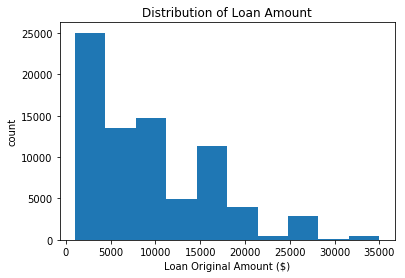

In [53]:
# A simple histogram plot of the variable LoanOriginalAmount
plt.hist(data=df_clean, x='LoanOriginalAmount');
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('count');
plt.title('Distribution of Loan Amount');

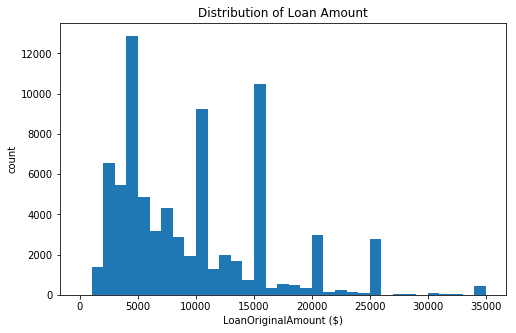

In [54]:
# plotting with a standard-scaled plot
binsize = 1000
bins = np.arange(0, df_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

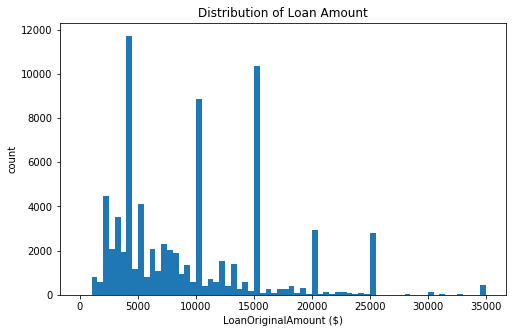

In [55]:
# investigating further on an even smaller bin size
binsize = 500
bins = np.arange(0, df_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

### Observation

The peak values are at around 5k, 10k, 15k, 20k, 25k and 35k (in dollars). This means that loans are given out in rounded figures and in multiples of $5k. 
<br>
I observe that majority of loans are given out at 4,000 , 10,000 and 15,0000 dollars. So the distribution is Tri-Modal

### Question 2:

Next up, the First predictor variable of interest: StatedMonthlyIncome

### Visualization

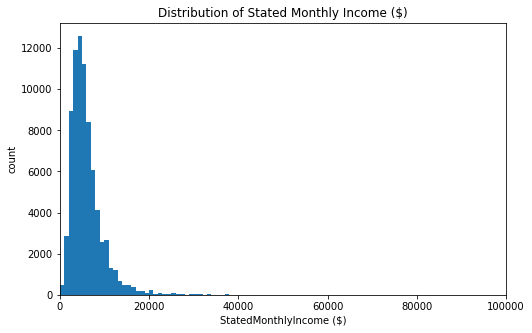

In [56]:
# starting with a standard-scaled plot
binsize = 1000
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.xlim(0, 100000)
plt.show()

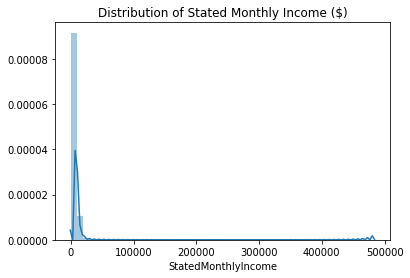

In [57]:
# plotting with seaborns distplot
sb.distplot(df_clean.StatedMonthlyIncome);
plt.title('Distribution of Stated Monthly Income ($)');

Based on the two plots above, There is a long tail distribution. 
This could indicate the presence of outliers which I'll check with a box plot.

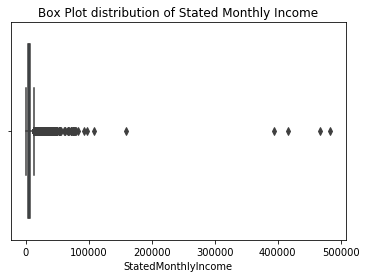

In [58]:
# Plotting a box plot with Stated monthly income variable to check for outliers
sb.boxplot(df_clean['StatedMonthlyIncome']);
plt.title('Box Plot distribution of Stated Monthly Income');

As seen above, The dots indicates the presence of outliers.<br>
I'll go ahead to use the IQR method to detect outliers, then trim to remove those outliers

In [59]:
# Using IQR method to detect outliers
Q1 = df_clean['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_clean['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5*IQR  #Data which falls below this is an outlier
UpperLimit = Q3 + 1.5*IQR  #Data which falls above this is an outlier
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [60]:
shape = df_clean.shape
print('The shape before removing ouliers is: ', shape)

The shape before removing ouliers is:  (77543, 20)


In [61]:
# Transformation to remove outliers
# Trimming
df_clean = df_clean[df_clean['StatedMonthlyIncome'] < UpperLimit]

In [62]:
new_shape = df_clean.shape
print('The shape after removing ouliers is: ', new_shape)

The shape after removing ouliers is:  (74035, 20)


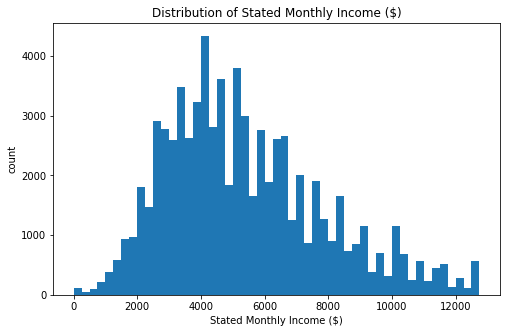

In [63]:
# Plotting an histogram with trimmed dataframe
binsize = 250
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

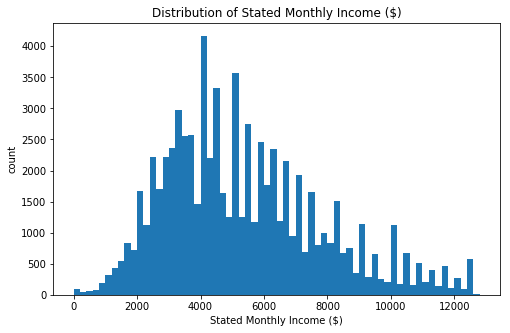

In [64]:
# investigating further with a reduced bin size
binsize = 200
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

### Observation

Stated Monthly Income had a long-tailed distribution with a lot of people earning on the low stated Monthly Income end. When trimmed and capped to remove outliers, a significant peak is found around the 4,000(dollars) mark.<br>
Its interesting to note a little peak at $0 as well. This is representing people who are unemployed.

**NOTE :** I couldn't plot on a log scale because of the 0 dollars minimum stated monthly income

### Question 3:

Which Income Ranges, are getting the most loan Amount?

### Visualization

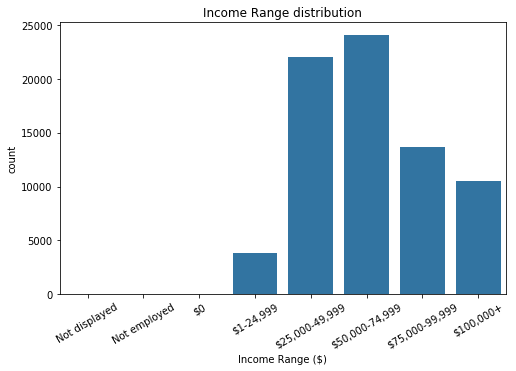

In [65]:
plt.figure(figsize=[8, 5])
sb.countplot(df_clean.IncomeRange, color=base_color);
plt.title('Income Range distribution');
plt.xlabel('Income Range ($)');
plt.xticks(rotation=30);

### Observation

The Income Range 25,000-75,000 ($) gets the most Loan Amount

### Question 4:

Next up, the Second Predictor variable of interest DebtToIncomeRatio

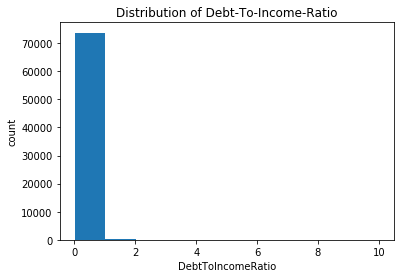

In [66]:
# A simple histogram plot of the variable 
plt.hist(data=df_clean, x='DebtToIncomeRatio');
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of Debt-To-Income-Ratio');

In [67]:
df_clean['DebtToIncomeRatio'].describe()

count    74035.000000
mean         0.263610
std          0.322497
min          0.010000
25%          0.160000
50%          0.230000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

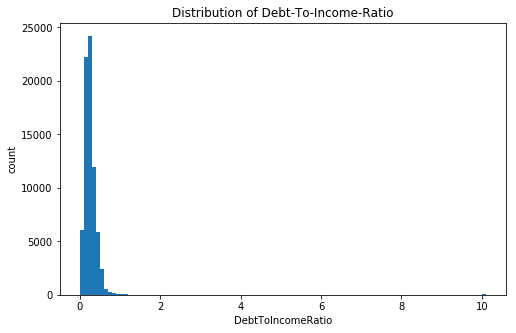

In [68]:
# plotting with a standard-scaled plot
binsize = 0.1
bins = np.arange(0, df_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of Debt-To-Income-Ratio');
plt.show()

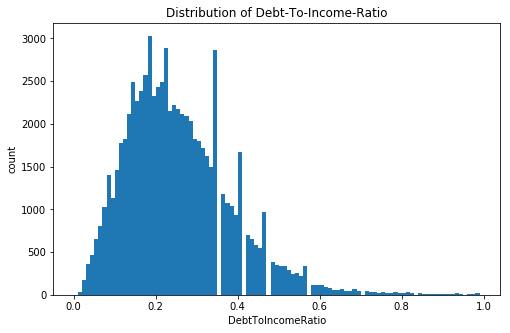

In [69]:
# Investigating further on an even smaller bin size
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of Debt-To-Income-Ratio');

### Observation

Generally, for standard loans Lenders prefer a debt-to-income-ratio thats 0.36 (36%) or leser. But depending on the loan type 50% is a threshold value. <br>

As seen by the plot above, large spikes in frequency are observed around 0.2 and 0.36. This implies that majority of borrowers have a Debt-To-Income Ratio below the threshhold value.

### Question 5:

Next up, I'll check the Prosper Score, which measures the amount of risk a lender can expect if the loan is approved.
Lenders usually determine loan amounts based on this score.<br>

This score will effect the Maximum Loan Amount given, So I'll like to check the distribution.


### Visualization

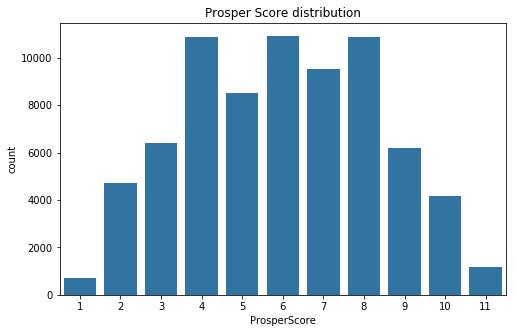

In [70]:
plt.figure(figsize=[8, 5])
sb.countplot(df_clean.ProsperScore, color=base_color);
plt.title('Prosper Score distribution');

### Observation

Prosper score which assesses risk levels for loan is roughly trimodal at  4, 6, 8 risk levels <br>
It is worthy to keep in mind that The best risk score to receive a high loan Amount is 10/11

### Question 6:

Next, i'll check the distribution of Employee Status duration<br>


### Visualization

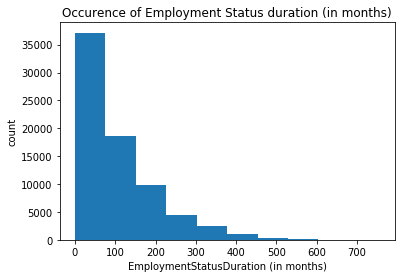

In [71]:
# A simple histogram plot of the variable 
plt.hist(data=df_clean, x='EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration (in months)');
plt.ylabel('count');
plt.title('Occurence of Employment Status duration (in months)');

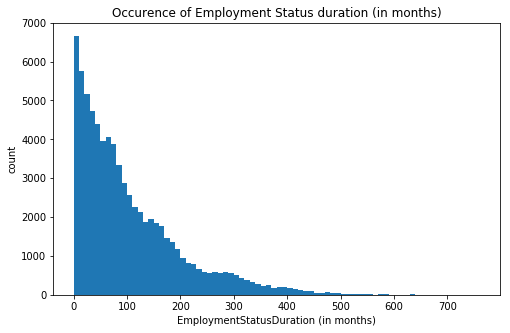

In [72]:
# plotting with a standard-scaled plot
binsize = 10
bins = np.arange(0, df_clean['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('EmploymentStatusDuration (in months)');
plt.ylabel('count');
plt.title('Occurence of Employment Status duration (in months)');
plt.show()

### Observation

The plot above shows Employee Status duration.

### Question 7:


Next, I'll like to check out Loan term

### Visualization

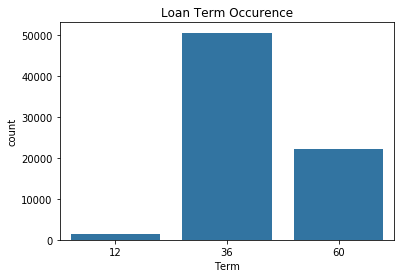

In [73]:
sb.countplot(data=df_clean, x='Term', color=base_color)
plt.title('Loan Term Occurence');

### Observation

This shows that majority of the loan is termed at 36 months (3 years)

### Question 8:

Next up, another variable of interest MonthlyLoanPayment

### Visualization

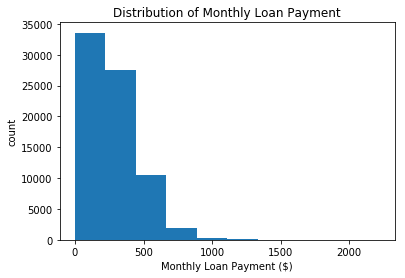

In [74]:
# A simple histogram plot of the variable 
plt.hist(data=df_clean, x='MonthlyLoanPayment');
plt.xlabel('Monthly Loan Payment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');

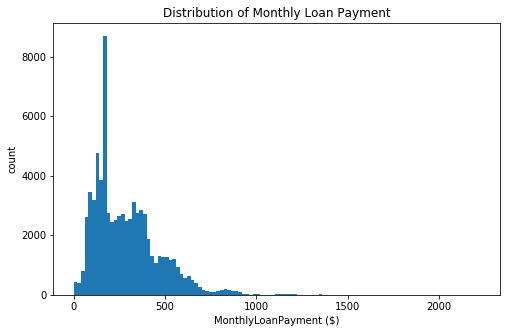

In [75]:
# plotting with a standard-scaled plot
binsize = 20
bins = np.arange(0, df_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('count');
plt.title('Distribution of Monthly Loan Payment');
plt.show()

### Observation

The distribution is unimodal with a large number of loaners making a monthly payment at approximately 200 dollars.<br>
Majority of the monthly loan payment is below 500 dollars.<br> 
It is also interesting to note that some people are not paying monthly.

### Question 9:

I'll move on to other variables in the dataset.<br>
**Ordinal Variables**

### Visualization

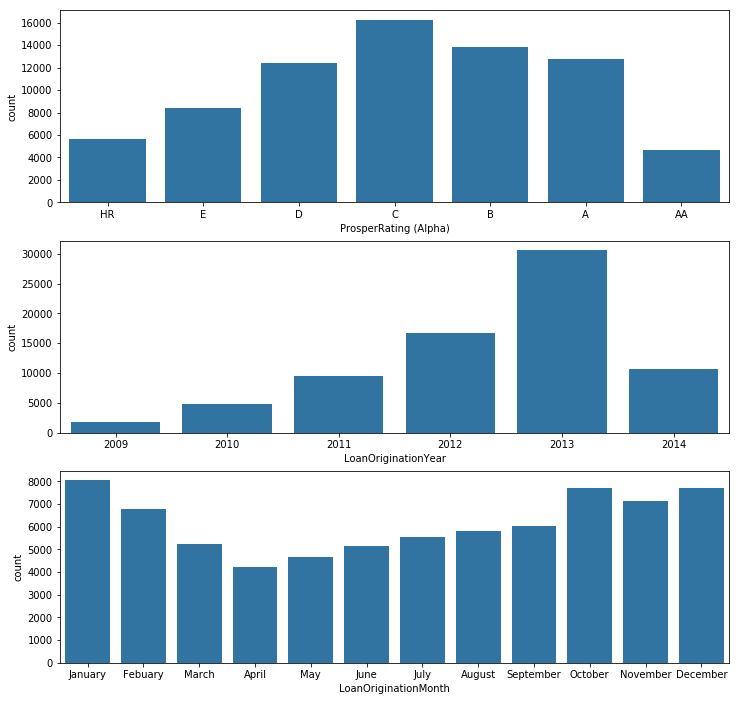

In [76]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

base_color = sb.color_palette()[0]

sb.countplot(data = df_clean, x = 'ProsperRating (Alpha)', color = base_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'LoanOriginationYear', color = base_color, ax = ax[1])
sb.countplot(data = df_clean, x = 'LoanOriginationMonth', color = base_color, ax = ax[2])

plt.show()

### Observation

Majority of Prosper ratings is C which indicates Average risk level.<br>

Most of the Loans originated/ were generally made in the year 2013 and were made towards the end of a year (October, November, December) or at the beginning of a year (January, Febuary)

From my observation in the Loan Origination plot. 
I'm curious to know if in the year 2013, probability of getting a high loan amount is high compared to other years. I'm interested in knowing the average loan amount to a person in each year.
I'll explore this in Bivariate plot section

### Question 10:

I'll move on to other variables in the dataset.<br>
**Nominal Variables**

### Visualization

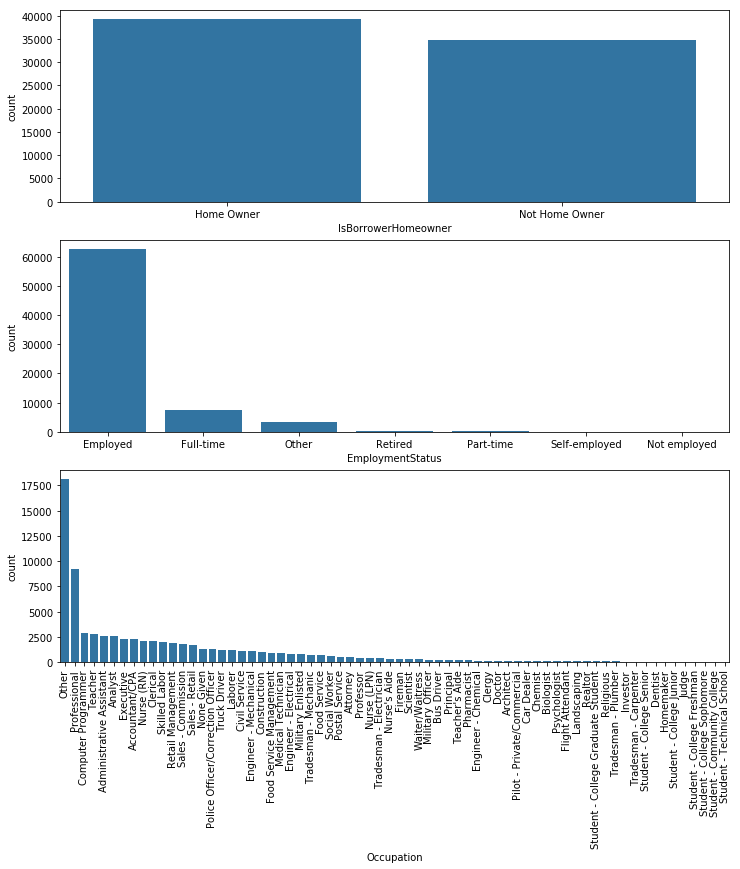

In [77]:
# let's plot all three together to get an idea of each variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'IsBorrowerHomeowner', order = df_clean['IsBorrowerHomeowner'].value_counts().index, 
             color = base_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'EmploymentStatus', order = df_clean['EmploymentStatus'].value_counts().index,
             color = base_color, ax = ax[1])
sb.countplot(data = df_clean, x = 'Occupation', order = df_clean['Occupation'].value_counts().index, 
             color = base_color, ax = ax[2])
plt.xticks(rotation=90);

plt.show()

### Observation

About 60% of the borrowers are home owners.<br>
Most Borrowers Employment Status are Employed or Full-time <br>
The top Borrower Occupation are Professional, Executives, Computer Programmer, Teacher, Analyst and Administrative Assistant. 

### 4.1 Observations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Loan Original Amount variable took a range of 1,000 to 35,000 dollars. After plotting the data looked Trimodal with a peak just below 5,000 and the other peaks at 10,000 and 15,000. Also, There was no unusual points so I didn't see the need to perform any transformations. <br>

The Loan Origination rose gradually over the years, then 2013 it spiked up. Then dropped back in the next year.
More loans were issued out in 2013

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the stated monthly income variable, outliers were observed. These points were abnormally far from other data point and seemed highly unlikely to be a Monthly income. For safety, these points were removed by trimming in order to move forwards. I noted down the shape of the dataframe before removing outliers and after removing outliers.
<br>

When investigating the Debt to Income Ratio the plot was scaled to focus on range of 0.1 to 1.0 to discover interesting insights.

## 5. Bivariate Exploration

In this section, I'll be investigating relationships between pairs of variables previously introduced.

### Question 11:

To start off with, I want to look at the pairwise correlations present between features in the data.

### Visualization

In [78]:
# placing numeric variables together and categorical together
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'EmploymentStatusDuration', 'MonthlyLoanPayment']
categoric_vars = ['ProsperScore', 'ProsperRating (Alpha)','EmploymentStatus', 'IsBorrowerHomeowner', 'LoanStatus']

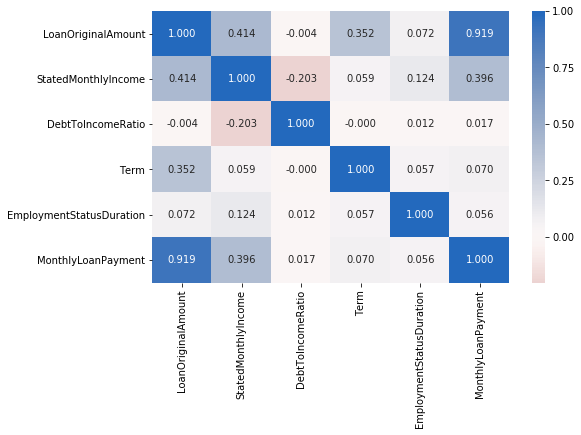

In [79]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Observation

From the heat map/Correlation plot, one can see that there is a strong relationship between Monthly Loan Payment and Loan Original Amount(0.919).<br>
There's a weak positive relationship/correlation between Stated Monthly Income and Loan Original Amount (0.414)<br>
There's a weak positive relationship/correlation between Term and Loan Original Amount (0.352)<br>
There's a weak positive relationship/correlation between Term and Monthly Loan Payment (0.396)<br>

### Question 12:

I want to look at correlations using scatter plots with different variables

### Visualization

df_clean.shape= (74035, 20)
df_clean.shape= (74035, 20)


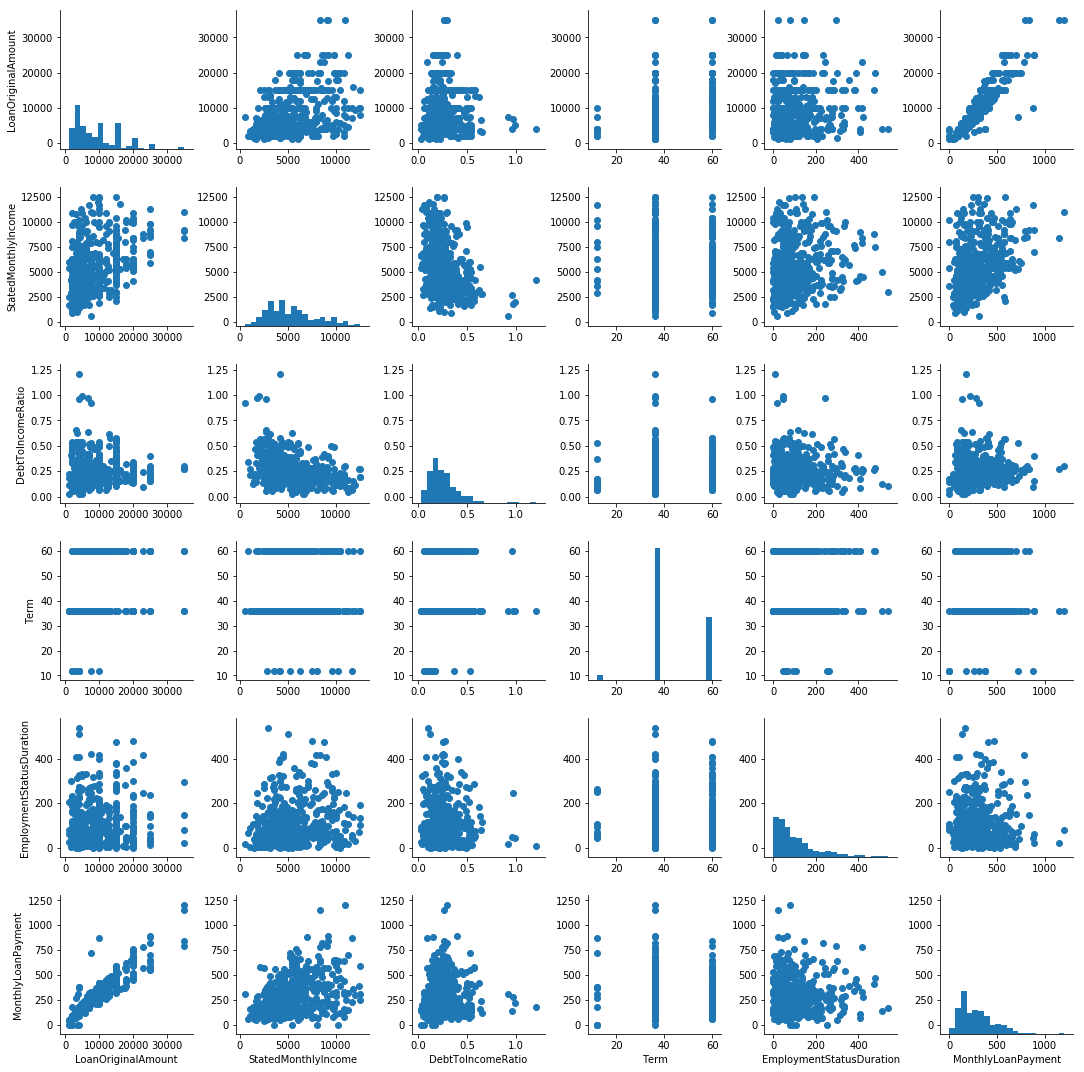

In [80]:
# plot matrix: sample 500 Loan data so that plots are clearer and they render faster
print("df_clean.shape=",df_clean.shape)
df_clean_samp = df_clean.sample(n=500, replace = False)
print("df_clean.shape=",df_clean.shape)

g = sb.PairGrid(data = df_clean_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Observation

As expected LoanOriginalAmount and MonthlyLoanPayment are highly correlated(i.e represent a very strong relationship). It is not surprising because if a borrower agrees to pay a high monthly Loan Payment, he'll likely get granted a higher Loan Amount.
Also  LoanOriginalAmount and StatedMonthlyIncome are positively correlated.


### Question 13:

Let's move on to looking at how Loan Original Amount and StatedMonthlyIncome correlate with the categorical variables.

### Visualization

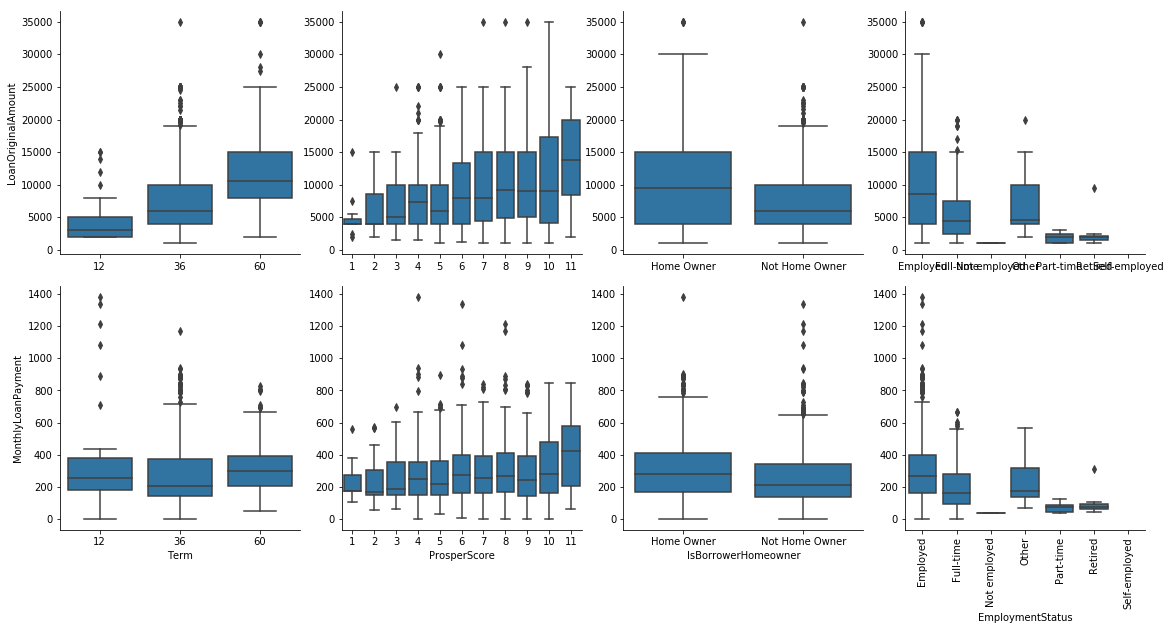

In [81]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


df_clean_samp = df_clean.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color);

plt.figure(figsize = [12, 15])
g = sb.PairGrid(data = df_clean_samp, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['Term','ProsperScore', 'IsBorrowerHomeowner',
                                                                                            'EmploymentStatus'],
                size= 4, aspect = 1.0);

g.map(boxgrid);
plt.xticks(rotation=90);

### Observation

Interestingly, there is a positive relationship between the Categorical variables and the two numeric variables of interest.
<br>

Borrowers with the features (Longer Loan Term , best Prosper score/low risk,  Home Owners, Employed) gets the Highest Loan Amount. <br>
Borrowers with best Prosper Score(low risk), Employed or owning a home, tend to pay higher Loan Payment monthly.

### Question 14:

Finally, let's look at relationships between the three categorical features.

### Visualization

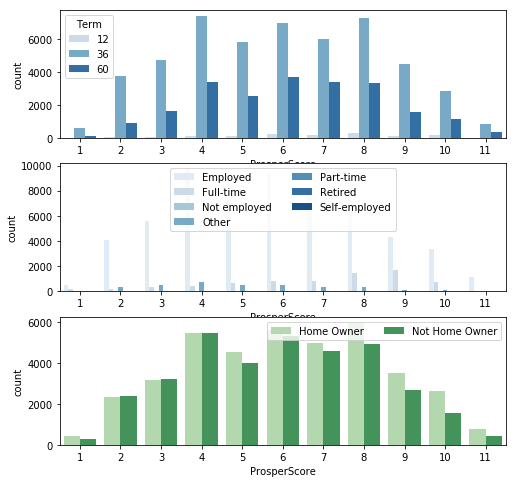

In [82]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Question 15:

Next, I'll like to see the relationship/correlation between two quantitative variable of interest, Monthly Loan Payment and Loan Original Amount

### Visualization

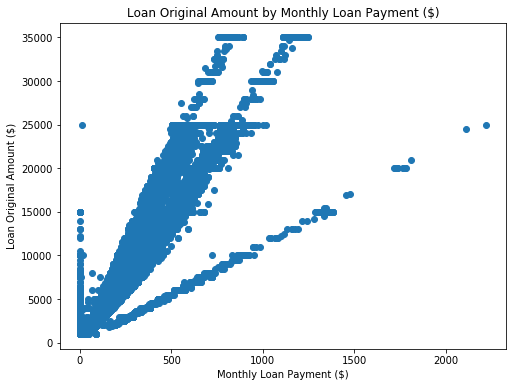

In [83]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment

plt.figure(figsize = [8, 6])
plt.scatter(data = df_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount by Monthly Loan Payment ($)')
plt.show()

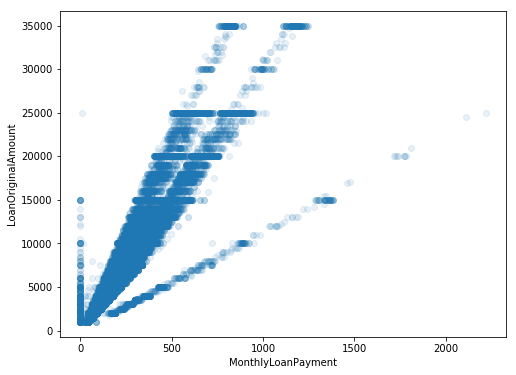

In [84]:
# intoducing jitter and transparency to help with overplotting
plt.figure(figsize = [8, 6]);
sb.regplot(data=df_clean, x='MonthlyLoanPayment', y='LoanOriginalAmount',fit_reg=False, x_jitter=0.3, scatter_kws=({'alpha':1/10}));

### Observation

From the plot above, there is a strong positive relationship between Loan Amount and Monthly Loan Payment. This is likely because, monthly loan payment is decided or calculated using the Loan amount <br>

I see that the plot seems to be split into three lines, could this be because of a categorical variable, I'll explore that further in multivariate plot section

### Question 16:

Next, Checking relationship between DebtToIncomeRatio and LoanOriginalAmount

### Visualization

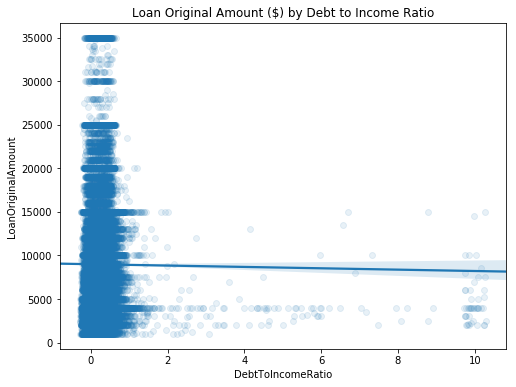

In [85]:
plt.figure(figsize=[8,6]);
sb.regplot(data=df_clean, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.title('Loan Original Amount ($) by Debt to Income Ratio');

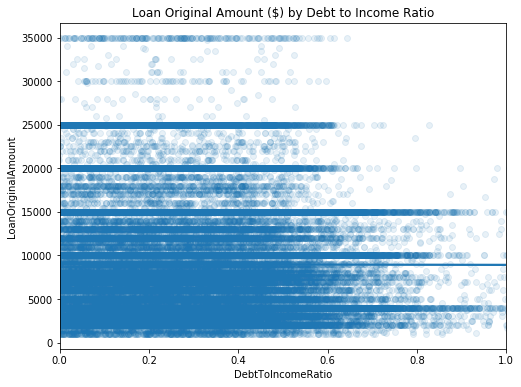

In [86]:
plt.figure(figsize=[8,6]);
sb.regplot(data=df_clean, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.xlim(0,1);
plt.title('Loan Original Amount ($) by Debt to Income Ratio');

### Observation

I estimate that having a low Debt-to-income-ratio will increase Loan Original Amount.
From the plot above, This estimate is proven to be true. The dots clustered at the left corner shows that when a borrower has a relatively low Debt to income ratio(< 1), the borrower is more likely either to get an high Loan Amount or a low Loan Amount. However, when the borrowers Debt to Incone ratio is high, the borrower is certain to get a Lower Loan Amount.

### Question 17:

Next, Checking relationship between DebtToIncomeRatio and LoanOriginalAmount

### Visualization

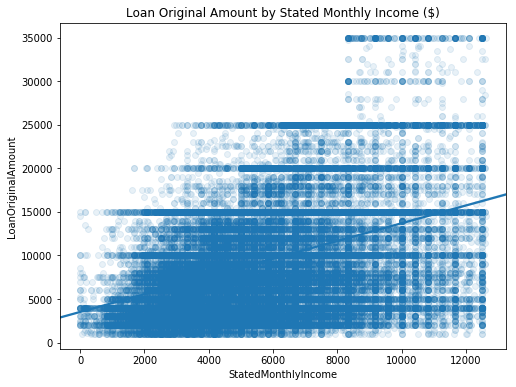

In [87]:
plt.figure(figsize=[8,6]);
sb.regplot(data=df_clean, x='StatedMonthlyIncome', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.title('Loan Original Amount by Stated Monthly Income ($)');

### Observation

My earlier assumptions is that the higher the Monthly Income the higher the Loan Amount. This assumption is proven to be true from the following plot.<br> 
When a borrower has  relatively low Monthly Income (<8,000) the probabilities of getting low  and high Loan Amount are similar.<br> However, when the borrower’s Monthly Income is high (>8,000), he/she is more likely to get a High Loan Amount

### Question 18:

Next, I'm interested in which Occupation is likely to be given a high Loan Amount

### Visualization

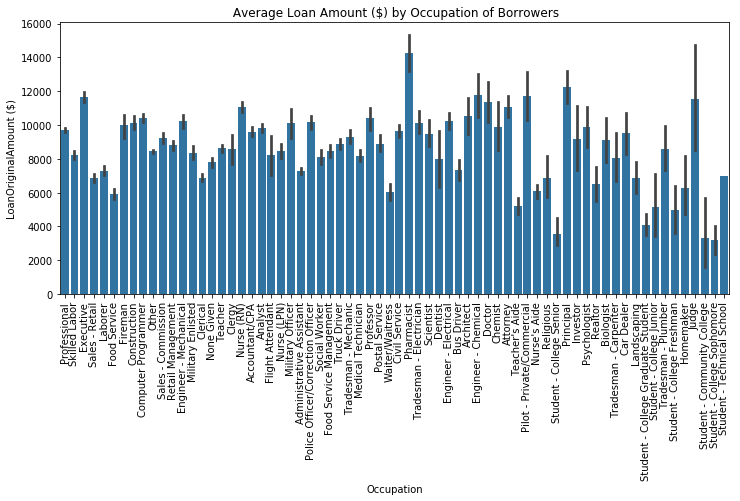

In [88]:
plt.figure(figsize=[12,5])
base_color = sb.color_palette()[0]
sb.barplot(data=df_clean, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount ($)')
plt.title(' Average Loan Amount ($) by Occupation of Borrowers')
plt.xticks(rotation=90);

### Observation

The Top Occupation with the highest Loan Amount are Judge, Pharmacist and Doctor. This could be because these are the highest paying jobs.

### Question 19:

Next, I want to see how prosper score affects Loan Amount

### Visualization

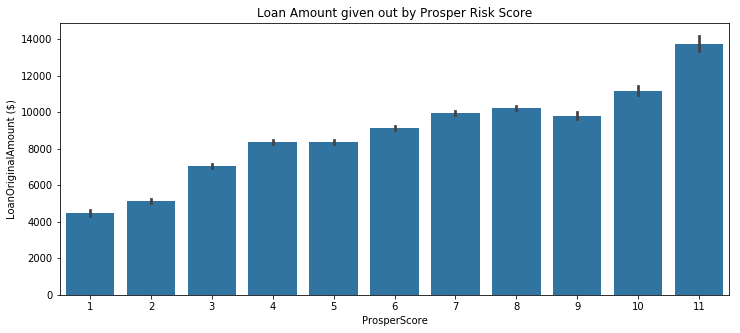

In [89]:
plt.figure(figsize=[12,5])
base_color = sb.color_palette()[0]
sb.barplot(data=df_clean, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount ($)');
plt.title('Loan Amount given out by Prosper Risk Score');


### Observation

As seen from plot above, generally the Loan Amount increases as the Prosper risk reduces(or Prosper number increases).
This shows that low/no risk borrowers have a higher chance of getting larger Loan Amounts.

### Question 20:

Next, I'll like to see if having a home will aid in getting a highloan.

### Visualization

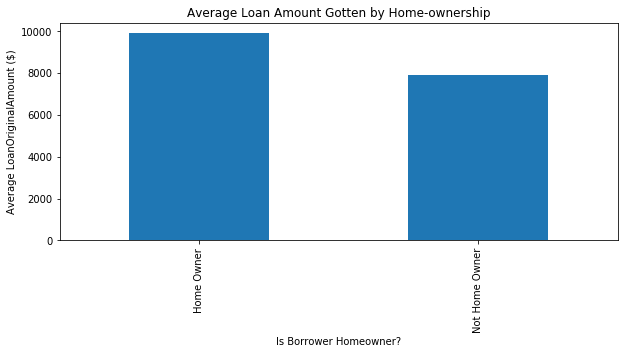

In [90]:
#Plot average Loan Amount by Home-ownership
data = df_clean.groupby('IsBorrowerHomeowner').mean()['LoanOriginalAmount']
#Create a plot as the variable "ax"
ax = data.plot(kind='bar',
               title="Average Loan Amount Gotten by Home-ownership",
               figsize = (10,4), color=base_color)
#Set axis labels for the "ax" plot
ax.set(xlabel='Is Borrower Homeowner?',
       ylabel='Average LoanOriginalAmount ($)');

### Observation

This plot shows that Borrowers with a home are getting more loans combined that Borrowers without one.

### 5.1 Observations

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loan Amount has a positive correlation with Monthly Income. I discovered that with borrowers with a relatively low Monthly Income, the probabilities of getting a Low or High Loan Amount is slightly similar. However, with a High Monthly Income, the Loan Amount received is Higher.<br>

An interesting discovery is that as Debt-To-Income-Ratio increases, the Loan Amount decreases as well. This is because Lenders classify a High Debt-To-Income-Ratio as a borrowinmg risk so they tend to Loan out less money to this category of people.
<br>

There was also an interesting relationship between Loan Amount and the Categorical features. More Loans are associated with Borrowers with a Longer loan Term, Low risk involved(high Prosper Score), Owning a Home and being successfully employed.<br>

A positive linear relationship was observed was observed when Loan Amount was plotted against Monthly Loan Payment. The scatter plot showed 3 pair of lines. This will have to be explored/investigated further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed that Borrowers with a Home and successfully employed paid the most Monthly loan

## 6. Multivariate Exploration


The main thing I want to explore in this part of the analysis is see if/how my variables are Strengthened by other variables

### 6.1 Question 21

I observed a positive correlation earlier between Loan Amount and Stated Monthly income, but observed three lines. I'll like to explore that further with a plot to check if a third variable is at play.

### Visualization

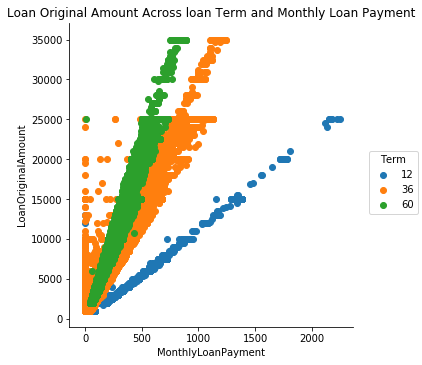

In [91]:
g = sb.FacetGrid(data = df, hue = 'Term', size = 5);
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');
plt.title('Loan Original Amount Across loan Term and Monthly Loan Payment')
g.add_legend();

### Observation

From the plot, as earlier assumed, a third variable, Loan Term is involved. This plot above shows that borrowers with longer Loan Term 36, 60 months receives higher Loan amount. <br>
For a maximum Loan Amount of 35,000 the Loan Term is longer,(36 or 60 months)

Also, I observed that For a longer Loan Term the scheduled monthly payment is less than that of small term (12months).

### Question 22:

Next, I want to understand how Loan Term and Prosper score effects the Loan Amount to be given

### Visualization

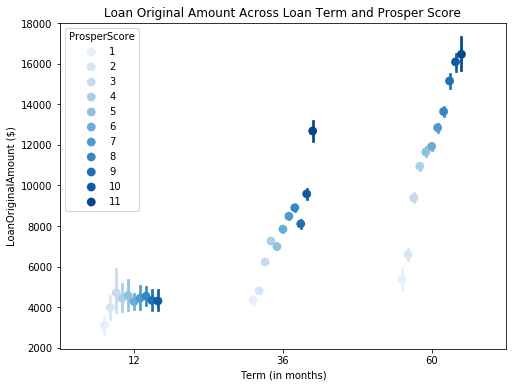

In [92]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Term (in months)')
plt.show();

### Observation

This plot shows that if the Loan term(in months) is higher say 60 months and the Prosper score is higher (less risk) say 10 or 11, the borrower is more likely to get a large Loan Amount.

### Question 23:

Next, i'd like to see if being a Home Owner and having a good risk score will effect the Loan Amount

### Visualization

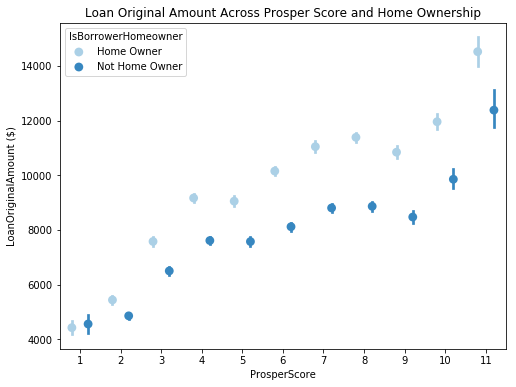

In [93]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('ProsperScore')
plt.show();

### Observation

The plot above shows that home-owners with a good Prosper score(low risk) is likely to get a Large Loan Amount.

### 6.1 Observations

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Monthly Loan payment being positively correlated with Loan Amount was strengthened by Loan Term. Loan term is an important factor in issuing out loans. Larger Loan Amounts are issued out for longer term. 
<br>

I discovered that though Loan Term plays a part in determining the amount of loan to be given out. It is also influenced by the Prosper score (risk score).That is, The Longer the Loan Term, and the better the risk score(Prosper Score), the larger the Loan Amount to be given out. This could be because Lenders are more open to giving out loans to borrowers who they don't assess as risks(for defaulting), and providing a long term to pay back the large Loan amount as an assurance.
<br>


### Were there any interesting or surprising interactions between features?

There wasn't any surprising interactions between features here.
But, I found it interesting that Loan Term seemed to have such an effect in the scatter plot. That for each loan Term one could also go ahead to create subplots to show how it affects loan amount.

## 7. Conclusion

Steps taken during the Data Exploration;
1. I started out by importing the data, understanding the variables by looking at the data dictionary. Then, I performed some preliminary assessment and cleaning in data wrangling phase.
2. Next, I created a subset of the dataframe, this subset dataframe containing variables i was particularly interested in exploring.
3. I started off with The Univariate plotting, and explored the distribution of my main feature, Loan Original Amount, and predictor variables as well. I introduced these variables well in the univariate plotting section, before diving to the next.

4. Then, in Bivariate section, I used a standard heat map to show correlations between the numerical variables, the i plotted scatterplot subplots of variables to check further.

5. I plotted a matrix plot grid to see how the Numerical variables (particularly Loan Amount) were affected by the Categorical variables, it got quite interesting here for me.

6. I delved further in using individual plots to show relationships between the main variable and predictor variables (Stated Monthly Income, Debt-To-Income-Ratio). I dcided to show whuch categorical features got the most Loan amounts with bar plots (Home Owners, Occupation, Prosper score 10/11).

7. Delving into the multivariate plotting, to figure out if they were features that could strengthen some relationships observed. I discovered a few, like Loan Term, Prosper Risk Score.

**A summary of my main findings**<br>

In This exploratory analysis I discovered that more loans were issued in the year 2013 and also during January, Febuary and Suffix -Ember Months. I discovered that for a Large Loan the Loan Term is 36 or 60 months. <br>

To be granted access to these large loans I need to have a good Debt-To-Income-Ratio( preferably 0.50 or lesser) dependent on Loan Type. <br>

To get a large loan as a borrower, I need to get have an Occupation that pays a Large Monthly Income, To show ability to pay back. Or, at least have a Large Monthly Income<br>

Also, I need to have a good prosper Risk Score (10/11) and possibly own a Home as well ( to show stability or for Collateral).